# Objective Function Derivation

### Principle of Objective Function Derivation

- The ultimate objective for a trading strategy, or any component of the trading strategy is always the expected amount of money that can be made. Although we also have some other objective function, those are mostly used to determine or regulate the trade amount for a better profit.
- The first step is to assume we will trade in some way based on the signal, risk and market impact function.
- Then we have a prediction of a certain component. Use the prediction to trade with a given trading strategy.
- After the trade, we get a realization of the PNL based on the realization of the component.
- Then we calculate the PNL as a function of the prediction and the realization of the component, as well as other components that we do not care about in this case.
- In this way, we get the objective function as a function of the prediction and realization of the component.

### Objective Function for Return Prediction

- Suppose we trade based on a mean-variance optimization of a single instrument as
$$U = f x - \frac{1}{2} \lambda \sigma^2 x^2$$
where $x$ is the dollar volume of the position, and $f$ is the realization of the return, $\lambda$ is the risk aversion coefficient, $\sigma^2$ is the variance of the portfolio. 
- The optimal position is determined using the above utility function as
$$x = \frac{\hat{f}}{\lambda \sigma^2}$$
Here $\hat{f}$ is the prediction of return since we do not know the true return ahead of time.
- Suppose the parameter $\lambda$, $\sigma^2$ are given and the value of $\sigma^2$ is its true value, then after the realization of return $f$, the realized utility function is
$$f x - \frac{1}{2} \lambda \sigma^2 x^2 = \frac{f\hat{f}}{\lambda \sigma^2} = -\frac{1}{2}\lambda \sigma^2 (\hat{f}^2 - 2 f \hat{f})$$
- Therefore, the objective function when predicting return is to minimize $\hat{f}^2 - 2 f \hat{f}$.
- Since all we can control is $\hat{f}$ before $f$ is realized, the objective function does not change if we add the value $f^2$, hence we get the least square objective $(f - \hat{f})^2$.
- The above objective can also be considered as the regret of not knowing the true parameter. The regret is expressed as the difference of realized utility with predicted parameter and the realized utility with the true parameter.
- This equation also shows how do we choose the weight among different stocks: assuming the stocks are not correlated, we should have the objective function to be weighted by the inverse of variance of each stock.
- If our trading strategy decides to trade with position proportional to the square root of daily volume, then the objective function will also have a term that is proportional to the square root of daily volume.

### Objective Function for Variance Prediction

- Suppose we trade using mean-variance optimization as above. This time the return is given and the variance is not given. The position we get is
$$x = \frac{f}{\lambda \hat{\sigma}^2}$$
- The realized utility function is
$$U = \frac{f^2}{\lambda \hat{\sigma}^2} - \frac{1}{2} \sigma^2 \frac{f^2}{\lambda \hat{\sigma}^4}$$
$$ = \frac{f^2}{\lambda}[\frac{1}{\hat{\sigma}^2}(1 - \frac{\sigma^2}{2\hat{\sigma}^2})]$$
- Therefore, the objective function for predicting the variance is
$$\frac{1}{\hat{\sigma}^2}(1 - \frac{\sigma^2}{2\hat{\sigma}^2})$$
- The above objective function has the correct behavior that the maximum value is obtained when $\hat{\sigma}^2 = \sigma^2$
- For scaling across different stocks, we can use the square of prediction $\hat{f}$ to scale across different stocks. This has the effect that if a stock or a time interval has a large predictable component, this stock or interval is more important because we are going to trade more on this interval.

### Objective Function for Volume Prediction

- The effect of volume is on the market impact. Ignoring the variance, the total utility with a position $x$ is
$$U = f x - \frac{m}{\sqrt{v}}x^{3/2}$$
where the latter part is the market impact, $m$ is the market impact coefficient.
- The optimal position given by the utility function is 
$$x = \frac{4f^2}{9m^2}\hat{v}$$
where $\hat{v}$ is the prediction of volume.
- After the realization of volume $v$, the realization of utility is
$$\frac{4f^3}{27m^2}(3\hat{v} - \frac{2\hat{v}^{3/2}}{\sqrt{v}})$$
Therefore, the utility for volume prediction is
$$3\hat{v} - \frac{2\hat{v}^{3/2}}{\sqrt{v}}$$
- The above utility has the correct behavior that it is largest when $\hat{v} = v$. On the other hand, it can explode when $\hat{v}/v$ is very large, hence we should filter out the days when the volume is unexpectedly low.

### Objective Function for Return with Threshold

- Suppose the trading strategy is we trade only if the prediction is larger than a threshold $t$, and there is a trasaction cost $b$ per dollar volume associated with each round trip with $t > b$. 
- Without loss of generality, we assume the return prediction $\hat{f} > 0$. Then the position is 0 if $\hat{f} < t$, and the position is $\frac{\hat{f} - b}{\lambda \sigma^2}$ if $f > t$.
- After the realization of return $f$, we get the realization of objective function as
$\begin{cases}
    0 & \hat{f} < t \\
    fx - bx - \frac{1}{2}\lambda \sigma^2 x^2 & \hat{f} > t
 \end{cases}
 $
- On the other hand, assuming we know the true return, then the utility we can get is
$\begin{cases}
    0 & f < t \\
    fx - bx - \frac{1}{2}\lambda \sigma^2 x^2 & f > t 
 \end{cases}
$
- Then we can use the difference between the two utility function, which can be regarded as regret, as the objective function. And depending on whether the magnitude of the realization return and predictino return are larger than 0, we have the following 4 cases:

$\begin{cases}
    0 & |\hat{f}| < t, |f| < t \\
    -\frac{1}{2} \frac{(|f| - b)^2}{\lambda \sigma^2} & |\hat{f}| < t, |f| > t \\
    \frac{1}{2} \frac{1}{\lambda \sigma^2} [2(f - b)(\hat{f} - b) - (\hat{f} - b)^2] & \hat{f} > t, |f| < t \\
    \frac{1}{2} \frac{1}{\lambda \sigma^2} [2(f + b)(\hat{f} + b) - (\hat{f} + b)^2)] & \hat{f} < -t, |f| < t \\
    \frac{1}{2} \frac{1}{\lambda \sigma^2} [- (\hat{f} - f)^2 ] & \hat{f} > t, f > t \space or \space \hat{f} < -t, f < -t\\
    \frac{1}{2} \frac{1}{\lambda \sigma^2} [- (\hat{f} - f)^2 - 4 fb] & \hat{f} > t,  f < -t \\
    \frac{1}{2} \frac{1}{\lambda \sigma^2} [- (\hat{f} - f)^2 + 4 fb] & \hat{f} < -t, f > t
 \end{cases}
$ 
- The above objective may not have optimal value at $\hat{t} = t$ if $t \neq b$, since it is possible that we can make a profit when the return is between b and t, but our strategy tells us not to trade at that time.
- The objective is not entirely differentiable at the boundaries of the regions because the action function is not smooth. This can be mediated by using a smoother decision function that has a probability of taking an action. It might also work because we always have data inside the differential region if we are using stochastic gradient descent.
- Another way of dealing with the non-smoothness of the objective function is we use it as the evaluation metric instead of the objective function to optimize, and there is no requirement on the smoothness of evaluation metric.
- When both the prediction and the realization have value larger than threshold, the utility has higher value when the magnitude of realization is large given the same difference between prediction and realization. 
- The above function, when used as objective function, is essentially the same as

$\begin{cases}
    0 & |\hat{f}| < t\\
    -\frac{1}{2} \frac{1}{\lambda \sigma^2} (\hat{f} - f)^2 & |\hat{f}| > t
 \end{cases}$ 
as they have the same gradient when using gradient optimization to optimize the function.
- The equivalent form above shows the net effect of the new objective is to only care about the forecast with magnitude larger than the threshold. Therefore, it puts higher weight on those data with large predictions. On the other hand, the objective function also dynamically change the prediction range so that there are an optimal number of data point above the threshold.
- In terms of machine learning with a strong nonlinearity model, this objective only focuses on making the the part with large prediction close to the true data, while it never hurts to ask the model to let every part close to the true data since it is a nonlinear function anyway. Therefore, it seems more wise to use the least square as objective, and this function is only useful as a metric.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

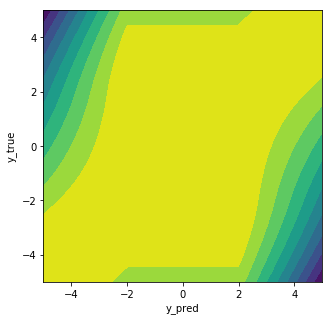

In [51]:
num_row = 100
x_data = np.linspace(-5, 5, num_row)
y_data = np.linspace(-5, 5, num_row)
data = np.dstack(np.meshgrid(x_data, y_data)).reshape(-1, 2)

z_data = np.zeros(len(data))

t = 2

x_data = data[:, 0]
y_data = data[:, 1]

index = (np.abs(x_data) < t) & (np.abs(y_data) < t)
z_data[index] = 0

index = (np.abs(x_data) < t) & (np.abs(y_data) > t)
z_data[index] = - (np.abs(y_data[index]) - t)**2

index = (x_data >= t) & (np.abs(y_data) < t)
z_data[index] = 2 * (x_data[index] - t) * (y_data[index] - t) - (x_data[index] - t)**2

index = (x_data <= -t) & (np.abs(y_data) < t)
z_data[index] = 2 * (x_data[index] + t) * (y_data[index] + t) - (x_data[index] + t)**2

index = ((x_data >= t) & (y_data >= t)) | ((x_data <= -t) & (y_data <= -t))
z_data[index] = - (x_data[index] - y_data[index])**2

index = (x_data >= t) & (y_data <= -t)
z_data[index] = -(x_data[index] - y_data[index])**2 - 4 * y_data[index] * t

index = (x_data <= -t) & (y_data >= t)
z_data[index] = -(x_data[index] - y_data[index])**2 + 4 * y_data[index] * t

plot_data = np.meshgrid(np.linspace(-5, 5, num_row), np.linspace(-5, 5, num_row))
plt.figure(figsize=(5, 5))
plt.contourf(*plot_data, z_data.reshape(plot_data[0].shape), levels=10)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Numerical Simulation of the Objective Function VS Least Square

This section simulates the effect of using objective function from regret minimization vs the least square objective.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# generate synthetic data with linear form
num_row = int(1e6)
num_col = 1
x_range = 1
beta_range = 0.2
noise_scale = 1
x_data = (np.random.random((num_row, num_col)) - 0.5 ) * x_range * 2
beta = (np.random.random(num_col) - 0.5) *beta_range * 2
y_data_true = np.sum(x_data * beta, axis=1)
y_data_observed = y_data_true + np.random.normal(size=num_row, loc=0, scale=noise_scale)

x_data_test = (np.random.random((num_row, num_col)) - 0.5 ) * x_range * 2
y_data_test_true = np.sum(x_data_test * beta, axis=1)
y_data_test_observed = y_data_test_true + np.random.normal(size=num_row, loc=0, scale=noise_scale)

In [3]:
x_data_test = (np.random.random((num_row, num_col)) - 0.5 ) * x_range * 2
y_data_test_true = np.sum(x_data_test * beta, axis=1)
y_data_test_observed = y_data_test_true + np.random.normal(size=num_row, loc=0, scale=noise_scale)

In [4]:
# linear regression using least square
linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(x_data, y_data_observed)
y_pred_linear = linear_regression.predict(x_data)
r2_linear = r2_score(y_data_observed, y_pred_linear)
print("R-squared from linear regression using least square: %.2f bp" % (r2_linear * 1e4))
print("slope of linear regression: %s" % (linear_regression.coef_))

R-squared from linear regression using least square: 126.12 bp
slope of linear regression: [0.19564424]


In [5]:
# calculate percentile of forecast, in order to find a suitable value for simulation
percentile_list = [5, 10, 25, 50, 75, 90, 95]
percentiles = np.percentile(y_pred_linear, percentile_list)
print("Percentiles for forecast made from linear regression using least square:")
for i in range(len(percentile_list)):
    print("percentile: %f, value: %f" % (percentile_list[i], percentiles[i]))

Percentiles for forecast made from linear regression using least square:
percentile: 5.000000, value: -0.176046
percentile: 10.000000, value: -0.156460
percentile: 25.000000, value: -0.097866
percentile: 50.000000, value: -0.000321
percentile: 75.000000, value: 0.097531
percentile: 90.000000, value: 0.156438
percentile: 95.000000, value: 0.176077


In [6]:
# function for performing a single gradient descent step
def gradient_descent(x, y, beta, threshold, learning_rate = 0.1):
    y_pred = np.sum(x * beta, axis=1)
    gradient = np.zeros(x.shape)
    
    index = (np.abs(y_pred) > threshold)
    x_sub = x[index]
    y_sub = y[index]
    y_pred_sub = y_pred[index]
    gradient[index] = 2 * (y_sub - y_pred_sub).reshape(-1, 1) * x_sub
    
    gradient = np.mean(gradient, axis=0)
    return beta + gradient * learning_rate    

In [7]:
# perform gradient descent on beta
threshold = np.percentile(y_pred_linear, 90)
beta = np.array([1.5])
num_step = 500
beta_history = [beta]
for i in range(num_step):
    beta = gradient_descent(x_data, y_data_observed, beta, threshold, 0.1)
    beta_history.append(beta)

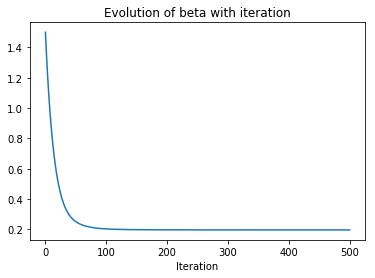

Final value of beta: 0.196535


In [8]:
# plot trajectory of beta
plt.plot(np.ravel(np.array(beta_history)))
plt.title("Evolution of beta with iteration")
plt.xlabel("Iteration")
plt.show()
print("Final value of beta: %f" % beta[0])

In [9]:
# simulate the pnl from data
def simulation(x, y, beta, threshold):
    y_pred = np.sum(x * beta, axis=1)
    position = np.zeros(len(y))
    index = np.abs(y_pred) > threshold
    position[index] = y_pred[index]
    pnl = y * position - threshold * np.abs(position)
    return pnl

In [10]:
# calculate sum of pnl for two sets of beta
pnl_linear_regression = simulation(x_data, y_data_observed, linear_regression.coef_, threshold)
pnl_regret = simulation(x_data, y_data_observed, beta, threshold)
print("Train PNL using beta from least square: %f, std: %f" % (np.sum(pnl_linear_regression), np.std(pnl_linear_regression[pnl_linear_regression != 0])))
print("Train PNL using beta from regret minimization: %f, std: %f" % (np.sum(pnl_regret), np.std(pnl_regret[pnl_regret != 0])))

Train PNL using beta from least square: 756.608493, std: 0.175678
Train PNL using beta from regret minimization: 747.756661, std: 0.176198


In [11]:
# calculate sum of pnl for two sets of beta
pnl_linear_regression = simulation(x_data_test, y_data_test_observed, linear_regression.coef_, threshold)
pnl_regret = simulation(x_data_test, y_data_test_observed, beta, threshold)
print("Test PNL using beta from least square: %f, std: %f" % (np.sum(pnl_linear_regression), np.std(pnl_linear_regression[pnl_linear_regression != 0])))
print("Test PNL using beta from regret minimization: %f, std: %f" % (np.sum(pnl_regret), np.std(pnl_regret[pnl_regret != 0])))

Test PNL using beta from least square: 752.568197, std: 0.176737
Test PNL using beta from regret minimization: 754.880717, std: 0.177250


In [13]:
# check how the result changes with threshold. Here the threshold is also the cost of transaction
for threshold in np.abs(np.percentile(y_pred_linear, [50, 60, 70, 80, 90, 95])):    
    # perform gradient descent on beta
    beta = np.array([1.5])
    num_step = 1000
    for i in range(num_step):
        beta = gradient_descent(x_data, y_data_observed, beta, threshold, 0.01)
    
    # calculate pnl 
    pnl_linear_regression = np.sum(simulation(x_data, y_data_observed, linear_regression.coef_, threshold))
    pnl_regret = np.sum(simulation(x_data, y_data_observed, beta, threshold))
    
    print("threshold: %.3f, beta_linear: %f, beta_regret_min: %f, pnl_least_square: %f, pnl_regret: %f" % (threshold, linear_regression.coef_[0], beta, pnl_linear_regression, pnl_regret))

threshold: 0.000, beta_linear: 0.195644, beta_regret_min: 0.197286, pnl_least_square: 12706.215872, pnl_regret: 12812.835121
threshold: 0.039, beta_linear: 0.195644, beta_regret_min: 0.197552, pnl_least_square: 9018.553059, pnl_regret: 9107.977206
threshold: 0.078, beta_linear: 0.195644, beta_regret_min: 0.198613, pnl_least_square: 5597.310475, pnl_regret: 5676.682001
threshold: 0.117, beta_linear: 0.195644, beta_regret_min: 0.199732, pnl_least_square: 2739.198764, pnl_regret: 2782.472149
threshold: 0.156, beta_linear: 0.195644, beta_regret_min: 0.203711, pnl_least_square: 756.608493, pnl_regret: 769.194863
threshold: 0.176, beta_linear: 0.195644, beta_regret_min: 0.208396, pnl_least_square: 143.483588, pnl_regret: 175.981807


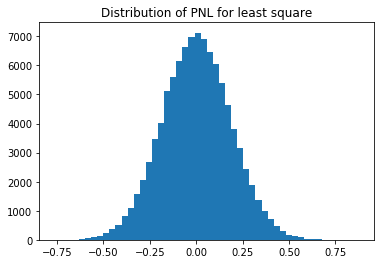

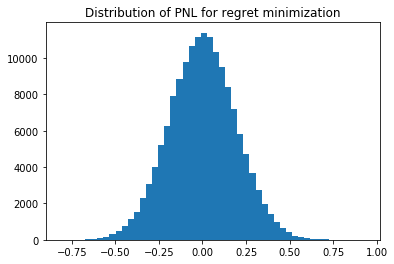

In [15]:
pnl_linear_regression_data = simulation(x_data, y_data_observed, linear_regression.coef_, threshold)
pnl_linear_regression_data = pnl_linear_regression_data[pnl_linear_regression_data != 0]
pnl_regret_data = simulation(x_data, y_data_observed, beta, threshold)
pnl_regret_data = pnl_regret_data[pnl_regret_data != 0]
plt.hist(pnl_linear_regression_data, bins=50)
plt.title("Distribution of PNL for least square")
plt.show()
plt.hist(pnl_regret_data, bins=50)
plt.title("Distribution of PNL for regret minimization")
plt.show()

**Conclusion**

- The new objective function dynamically adjust the coefficient larger when the threshold is changed to a larger value, so that it could get a smaller error while also maintain a higher number of chance to trade.
- Since the new objective function only focuses the range of data when the prediction is large, in this simple linear regression function this means it only cares about those with large value of predictors. This could lead to the disadvantage of unstable regression, but also to the advantage if there is a regime change hwen the predictor value is large.
- There is no consensus agreement on which of the objective function is better.
- The fact that the new objective function cares more about the large return events makes it more likely to make larger forecast than the original linear regression.